In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Layers for our neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# A pretrained model for transfer learning
from keras.models import Model
from keras.applications import vgg19

# Our normal python data science stack you've come to know and love
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

print(tf.__version__)

2.6.0


##Part 0: Welcome to Colab.
Before doing anything else, go to Runtime at the top of your screen, click "Change Runtime Type" and select "GPU."

Note that you'll have to re-upload any files on the left after leaving the Colab page.

##Part 1: Getting a Neural Network Working
Training a neural network is similar to training the sklearn models we've been using, but can be a little more complicated.  Let's start by looking at how we would train a neural network to classify a data set we're familiar with, the titanic data set. 

In [ ]:
# the same prep we did for titanic earlier in the semester 
df = pd.read_csv('https://raw.githubusercontent.com/CUNYTechPrep/2020-fall-data-science/master/Week5-RandomForest/data/titanic.csv')

df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)
selected_features = ['fare', 'age',  'sex_male', 'pclass_2', 'pclass_3',  'sibsp', 'parch', 'embarked_Q','embarked_S']
df['age'] = df['age'].fillna(-999)

X = df[selected_features]

y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)
df.head()

Lenght of our Training data: (712, 9) 
Length of our Testing data: (179,)


,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


## What are neural networks?
Neural networks are made of layers with the layers themselves made up of neurons.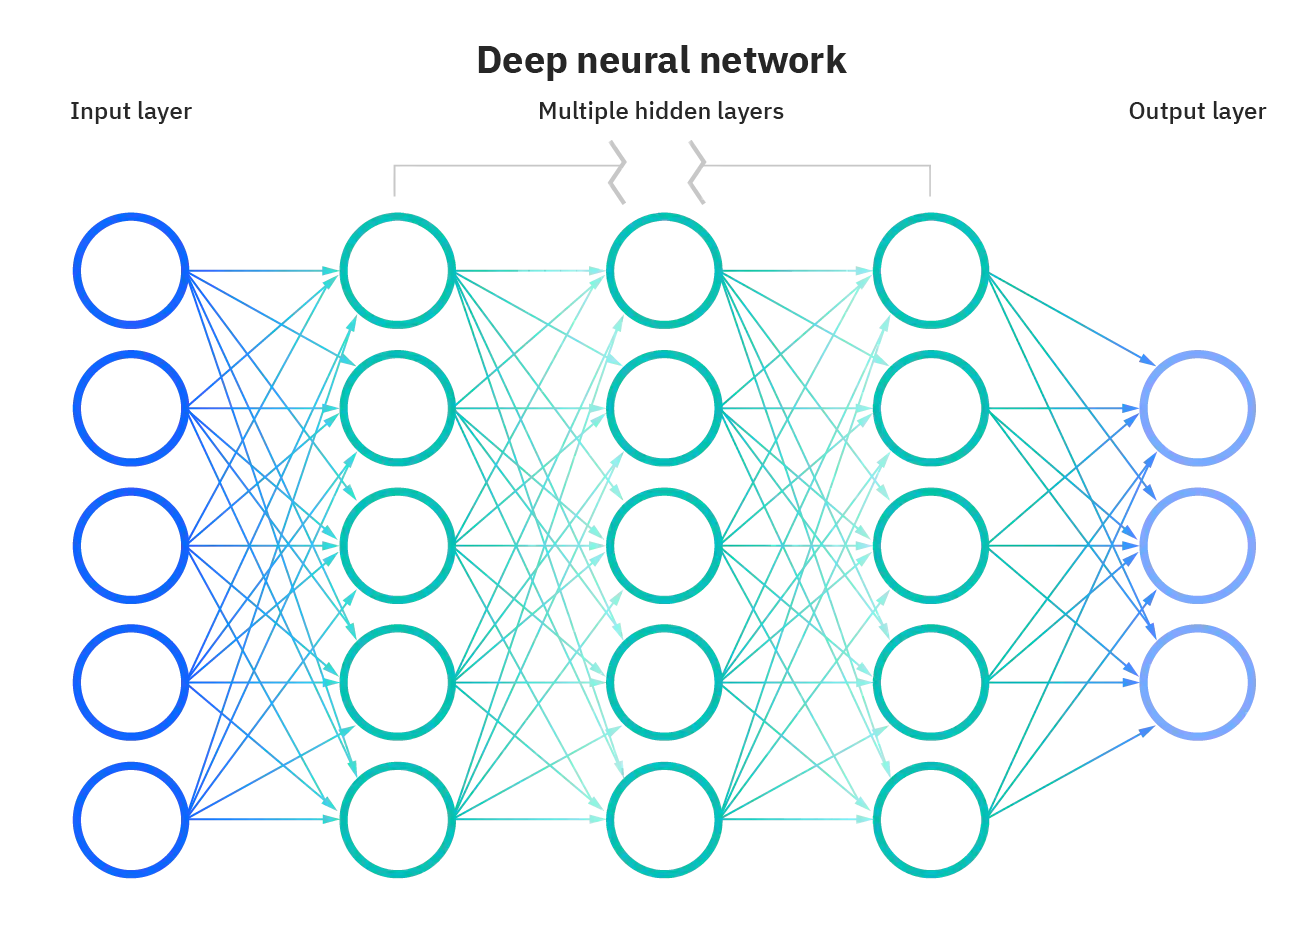

### This is what a single "neuron" looks like:
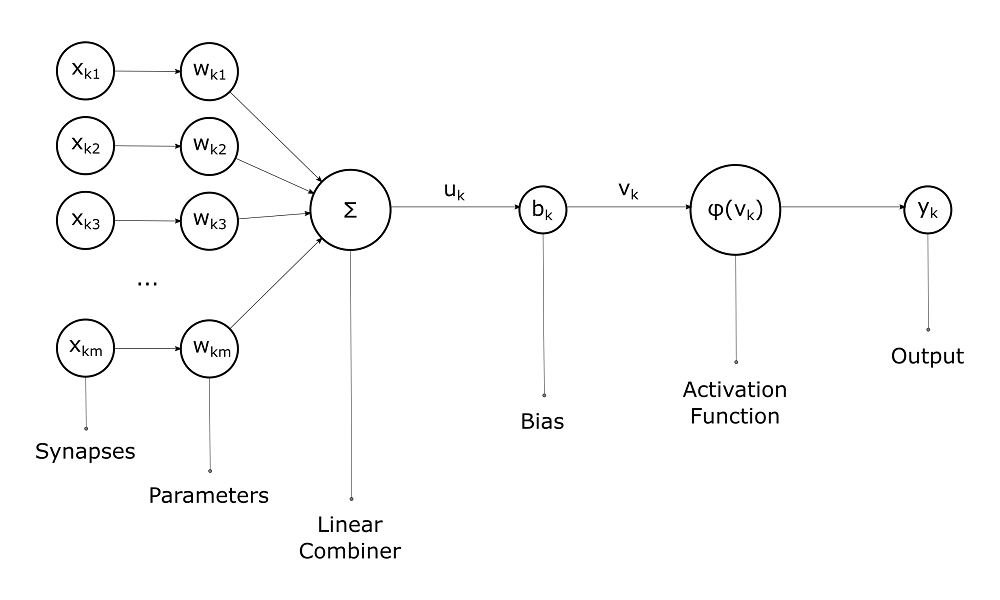

We build our own networks layer by layer using the Sequential function. 

The layers that contain the actual neurons are called "Dense" layers in tensorflow. To get a "deep" network, you add more dense layers. To get a "wide" network, you add more neurons in each layer.

Tensorflow expects two parameters for these dense layers. The first is the number of neurons. This is up to you, but somewhere between 64 and 1024 is a good starting point.

The other parameter is the activation functions.  Activation functions are very important and are their own field of research, but you'll be good if you always have it set to 'relu'.

The last Dense layer is the output layer, which requires special consideration.  The number of neurons in the output layer must be equal to the number of classes you are trying to predict.  

If the problem has only two classes, then you only put 1 and you set the activation to 'sigmoid.'  If the problem is a multiclass problem with N classes, you put the number N and set the activation to 'softmax'.

In [ ]:

model = tf.keras.models.Sequential(
  [                
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
]
)

You then need to "compile" the model before training it. There are three main parameters to consider: the optimizer, the loss function, and the metrics. 

Again, optimizers are a whole field unto themselves, we're really just scratching the surface.  There are multiple possible optimizers, and each optimizer has different parameters that can be changed. tf.keras.optimizers.Adam() is a good choice for most problems, and we'll use the default parameters.

The loss function depends on the problem.  For a binary classification problem, we use 'binary_crossentropy'.  For a multiclass problem we use 'sparse_categorical_crossentropy'.  For a regression problem we use 'mse'.

The metric is what metric you want the model to report while training.  We'll use accuracy, but for a regression problem you would need to use 'mse' or 'mae'.



In [ ]:
# note that the compile function operates "inplace," we don't return the model when we're done, similar to the fit method from sklearn
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['acc'])

We are now ready to train.  Training is a bit different and depends on exactly how you want to train your model.  We pass the training and test set like normal, but we also have to define the number of epochs, which is how long we want the model to train.

In [ ]:
epochs = 25
model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/25
20/20 [==============================] - 3s 15ms/step - loss: 2.6125 - acc: 0.6406 - val_loss: 2.4517 - val_acc: 0.5139
Epoch 2/25
20/20 [==============================] - 0s 4ms/step - loss: 1.9417 - acc: 0.6531 - val_loss: 2.7323 - val_acc: 0.6667
Epoch 3/25
20/20 [==============================] - 0s 4ms/step - loss: 1.2888 - acc: 0.6750 - val_loss: 1.2603 - val_acc: 0.5139
Epoch 4/25
20/20 [==============================] - 0s 4ms/step - loss: 0.9515 - acc: 0.6719 - val_loss: 1.9251 - val_acc: 0.6944
Epoch 5/25
20/20 [==============================] - 0s 4ms/step - loss: 1.1341 - acc: 0.6734 - val_loss: 1.1542 - val_acc: 0.6667
Epoch 6/25
20/20 [==============================] - 0s 5ms/step - loss: 1.2209 - acc: 0.6578 - val_loss: 1.6063 - val_acc: 0.6389
Epoch 7/25
20/20 [==============================] - 0s 4ms/step - loss: 1.0430 - acc: 0.6859 - val_loss: 1.6402 - val_acc: 0.6528
Epoch 8/25
20/20 [==============================] - 0s 4ms/step - loss: 1.8281 - acc: 0.6

In [ ]:
# now we evaluate our model
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5156 - acc: 0.7654


[0.5156229138374329, 0.7653631567955017]


We could tinker with this model, but we likely won't see much improvement.  This is because neural networks are very **data hungry.**  With less than 1,000 examples, our titanic data set is probably not big enough.  There is no strict number for the amount of data you need, but at least 10,000 examples is a good bet, 100,000 is much better, and the best models use training data with examples in the millions.

We usually don't use Neural Networks for traditional data sets like the titanic data set.  They are most useful on image recognition or NLP problems, so let's move on to image recognition.

##Part 2: Image Recognition with Convolutional Neural Networks

We're going to continue with the MNIST image recognition dataset we started on last time.  Since we're in a colab notebook, we'll use a keras load_data() function to read in the data, which conveniently splits it into train and test data for us.

In [ ]:
# load the data 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# check shapes to make sure we understand what's going on
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_train.shape

(60000, 28, 28)

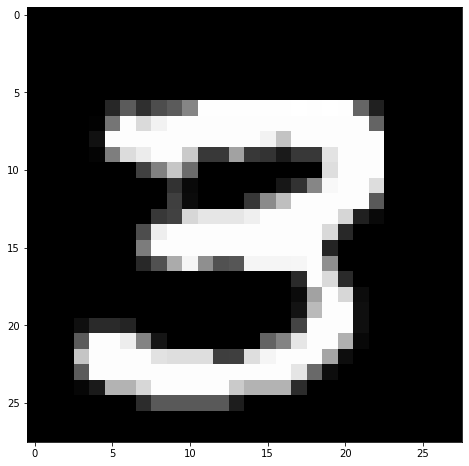

In [ ]:
# view some images to make sure everything looks good
# Set the size of our plot
plt.figure(figsize=(8,8))

# Select just one image from 
img = x_train[111]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.imshow(img, cmap='gray')

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
y_train = y_train.reshape(-1)

In [ ]:
x_test = x_test.reshape(-1, 28, 28, 1)
y_test = y_test.reshape(-1)

The difference between a convolutional neural network and other neural networks is that a CNN has special layers at the beginning.  

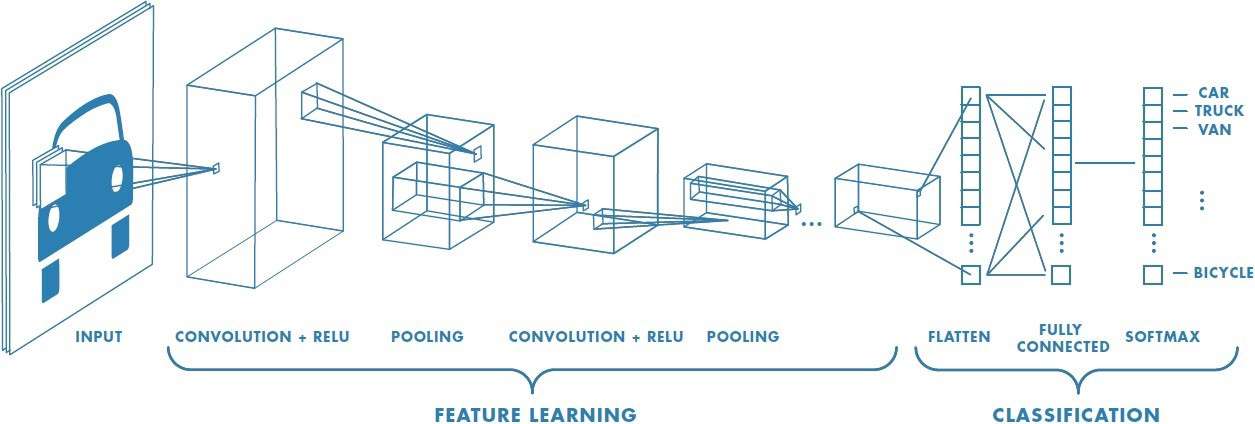

The convolutional layers apply filters to the image to transform the input.  The exact filters are learned throug the training process.


We build the model the same way, by adding our layers.  To make a CNN, we're going to add these convolutional layers at the beginning, as well as some MaxPooling layers, which combine the output of the previous convolutional layers.

The first layer needs an input_shape with the input of our image.  The kernel_size is almost always (3,3), this is the grid of pixels the convolution is considering.  I forget what filters is.

In [ ]:
model = tf.keras.models.Sequential()
# we start with some Conv2D layers alternating with some MaxPool layers
# the filter size increases, I don't know why
# we can add a lot of these chunks of Conv2D and MaxPool, up to 4 groups
model.add(tf.keras.layers.Conv2D(input_shape=(28,28, 1),filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))

model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))
# we then need a flatten layer before going to the Dense layers
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
epochs = 12
model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)


Epoch 1/12
1688/1688 [==============================] - 15s 8ms/step - loss: 0.1548 - acc: 0.9518 - val_loss: 0.0570 - val_acc: 0.9833
Epoch 2/12
  62/1688 [>.............................] - ETA: 12s - loss: 0.0388 - acc: 0.9899

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0407 - acc: 0.9892


[0.040733885020017624, 0.9891999959945679]

##Part 3: Transfer Learning

If I was asked to train an image classifier tomorrow, I would likely use transfer learning.  The idea of transfer learning is to make use of models that other organizations have trained for a long time on a lot of data.  We can download their weights and add layers on the end for our purposes. 

I used this tutorial: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

First, we're going to use a new data set, the cifar10 data set, a classic benchmark data set. https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(-1, 32, 32, 3)
y_train = y_train.reshape(-1)
x_test = x_test.reshape(-1, 32, 32, 3)
y_test = y_test.reshape(-1)

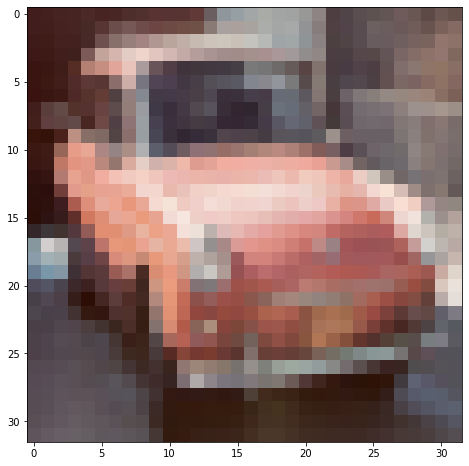

In [ ]:
# view some images to make sure everything looks good
# Set the size of our plot
plt.figure(figsize=(8,8))

# Select just one image from 
img = x_train[64]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(32,32,3)

# Plot reshaped image
plt.imshow(img, cmap='gray')

Let's first try using the same model we just used to get a benchmark, but with some tweaks to the input shape.

In [ ]:
# we can use the same code as before, but need to change the input shape
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(32,32, 3),filters=32,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2, 2))
# we then need a flatten layer before going to the Dense layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])
# Can we do other metrics besides accuracy?
epochs = 15
model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/15
1407/1407 [==============================] - 19s 13ms/step - loss: 1.6077 - acc: 0.4029 - val_loss: 1.2006 - val_acc: 0.5678
Epoch 2/15
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1673 - acc: 0.5852 - val_loss: 0.9733 - val_acc: 0.6572
Epoch 3/15
1407/1407 [==============================] - 17s 12ms/step - loss: 0.9746 - acc: 0.6588 - val_loss: 0.8571 - val_acc: 0.6930
Epoch 4/15
1407/1407 [==============================] - 17s 12ms/step - loss: 0.8412 - acc: 0.7058 - val_loss: 0.8231 - val_acc: 0.7148
Epoch 5/15
1407/1407 [==============================] - 18s 13ms/step - loss: 0.7570 - acc: 0.7375 - val_loss: 0.7658 - val_acc: 0.7298
Epoch 6/15
1407/1407 [==============================] - 18s 12ms/step - loss: 0.6706 - acc: 0.7655 - val_loss: 0.8286 - val_acc: 0.7184
Epoch 7/15
1407/1407 [==============================] - 17s 12ms/step - loss: 0.6136 - acc: 0.7862 - val_loss: 0.7347 - val_acc: 0.7552
Epoch 8/15
1407/1407 [==========================

In [ ]:
# evaluating our from-scratch CNN model
print('scratch CNN accuracy', model.evaluate(x_test, y_test)[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.9184 - acc: 0.7522
scratch CNN accuracy 0.7522000074386597


75% accuracy is pretty good on a classification problem with 10 classes.

Now for the transfer model.  First I'm going to create a validation set to use.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

In [ ]:
input_shape = (32, 32, 3)

# Load the model
vgg = vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)

# freeze the bottom layers and print them so we can look at them
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

80150528/80134624 [==============================] - 1s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fa6d01cfc50>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fa6d01de750>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fa6d0114110>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fa655e038d0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fa659b8d8d0>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fa659b94dd0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fa659b91910>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fa659b9a790>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fa659ba1590>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fa659ba1610>,block3_conv3,False


Now we can use the vgg model as a "feature extractor."  We're going to use it to make predictions and then store those predictions to feed into our own model.

In [ ]:
train_features_vgg = vgg_model.predict(x_train)
validation_features_vgg = vgg_model.predict(x_val)
test_features_vgg = vgg_model.predict(x_test)

In [ ]:
input_shape = vgg_model.output_shape[1]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(input_shape,)))
model.add(Dense(256, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [ ]:
epochs=20
model.fit(train_features_vgg, y_train, validation_data=(validation_features_vgg, y_val), epochs=epochs)

Epoch 1/20
1407/1407 [==============================] - 7s 4ms/step - loss: 1.5461 - accuracy: 0.4467 - val_loss: 1.3544 - val_accuracy: 0.5244
Epoch 2/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3567 - accuracy: 0.5219 - val_loss: 1.3249 - val_accuracy: 0.5380
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3005 - accuracy: 0.5435 - val_loss: 1.3037 - val_accuracy: 0.5462
Epoch 4/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2593 - accuracy: 0.5617 - val_loss: 1.2353 - val_accuracy: 0.5654
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2293 - accuracy: 0.5702 - val_loss: 1.2183 - val_accuracy: 0.5788
Epoch 6/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2060 - accuracy: 0.5762 - val_loss: 1.1977 - val_accuracy: 0.5886
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.1797 - accuracy: 0.5834 - val_loss: 1.2075 - val_accuracy:

In [ ]:
model.evaluate(test_features_vgg, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1532 - accuracy: 0.6041


[1.1532347202301025, 0.6040999889373779]

This model didn't actually perform as well as expected, let's try unfreezing some of the rows.

In [ ]:
input_shape = (32, 32, 3)

# Load the model
vgg = vgg19.VGG19(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = True

# set the later rows to be trainable
set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fa65990b990>,input_3,False
1,<keras.layers.convolutional.Conv2D object at 0x7fa65990be10>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fa659afc210>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fa6599a1590>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fa6599b4290>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fa6599148d0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fa6599a8150>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fa659a3c2d0>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fa659925ad0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fa659b58050>,block3_conv3,False


In [ ]:
model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
epochs = 20
model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/20
1407/1407 [==============================] - 85s 60ms/step - loss: 2.3041 - accuracy: 0.0994 - val_loss: 2.3030 - val_accuracy: 0.0980
Epoch 2/20
1407/1407 [==============================] - 83s 59ms/step - loss: 2.3029 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.0938
Epoch 3/20
1407/1407 [==============================] - 83s 59ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3029 - val_accuracy: 0.0930
Epoch 4/20
1407/1407 [==============================] - 83s 59ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0930
Epoch 5/20
1407/1407 [==============================] - 83s 59ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3033 - val_accuracy: 0.0938
Epoch 6/20
1407/1407 [==============================] - 83s 59ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3029 - val_accuracy: 0.0980
Epoch 7/20
1407/1407 [==============================] - 84s 59ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3031 -

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 2.3027 - accuracy: 0.1000


[2.302687883377075, 0.10000000149011612]

##To Continue Learning:
Often image data sets are too big to fit into memory.  Keras and Tensorflow have useful functions to deal with this, one is "flow_from_directory"

Image augmentation is also a common technique when training image classifiers.  Using batch sizes is another common technique.

Pytorch has actually surpassed tensorflow in popularity. I stuck with tensorflow because I felt like it was a little more beginner friendly, but I would recommend checking out what pytorch is all about if you're interested in working with neural networks.